In [50]:
import pandas as pd
import numpy as np

#Load data
dataset = pd.read_csv("diabetes.csv")
print(dataset.shape)
print(dataset.head())

#Split features
y = dataset["Outcome"]
x = dataset.drop("Outcome", axis=1)

print(y.head())
print(x.head())

#Train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

print("x_train: ",x_train.shape)
print("y_train: ",y_train.shape)
print("x_test: ",x_test.shape)
print("y_test: ",y_test.shape)

(768, 9)
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8 

In [51]:
### Technique from paper

from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

#Preprocess data
x_train['Glucose'] = x_train['Glucose'].replace(0, x_train['Glucose'].mean())
x_test['Glucose'] = x_test['Glucose'].replace(0, x_test['Glucose'].mean())

x_train['BMI'] = x_train['BMI'].replace(0, x_train['BMI'].mean())
x_test['BMI'] = x_test['BMI'].replace(0, x_test['BMI'].mean())

x_train['BloodPressure'] = x_train['BloodPressure'].replace(0, x_train['BloodPressure'].mean())
x_test['BloodPressure'] = x_test['BloodPressure'].replace(0, x_test['BloodPressure'].mean())

#Make model
model = RandomForestClassifier(n_estimators=100, random_state=0)

#Train model
model.fit(x_train, y_train)

#Evaluate model
y_pred = model.predict(x_test)

accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy", accuracy)

precision = metrics.precision_score(y_test, y_pred)
print("Precision", precision)

Accuracy 0.7864583333333334
Precision 0.7142857142857143


In [52]:
### Our improvement (Feature selection)

from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

#Use same data & preprocesing as paper

#Make model
model = RandomForestClassifier(n_estimators=100, random_state=0)

#Find important features
model.fit(x_train, y_train)
important_features = pd.Series(model.feature_importances_, index = x.columns).sort_values()

print(important_features)

#Drop non important features
x_train = x_train.drop("SkinThickness", axis=1)
x_test = x_test.drop("SkinThickness", axis=1)

x_train = x_train.drop("Insulin", axis=1)
x_test = x_test.drop("Insulin", axis=1)

x_train = x_train.drop("Pregnancies", axis=1)
x_test = x_test.drop("Pregnancies", axis=1)

x_train = x_train.drop("BloodPressure", axis=1)
x_test = x_test.drop("BloodPressure", axis=1)

# x_train = x_train.drop("DiabetesPedigreeFunction", axis=1)
# x_test = x_test.drop("DiabetesPedigreeFunction", axis=1)

accuracy_list = []
precision_list  =[]
values_list = []

#Train model
for i in range(10, 150, 10):
    for n in range(1, 10):
        for x in ["gini", "entropy", "log_loss"]:
            model = RandomForestClassifier(n_estimators=i, random_state=0, max_depth=n, criterion=x)
            model.fit(x_train, y_train)

            #Evaluate model
            y_pred = model.predict(x_test)

            accuracy = metrics.accuracy_score(y_test, y_pred)
            values_list.append("n_estimators: " + str(i) + " max_depth: " + str(n) + " criterion: " + str(x))
            accuracy_list.append(accuracy)

            precision = metrics.precision_score(y_test, y_pred)
            precision_list.append(precision)

index = accuracy_list.index(max(accuracy_list))

print("Accuracy: ", accuracy_list[index])
print("Precision: ", precision_list[index])
print(values_list[index])

SkinThickness               0.071343
Insulin                     0.074678
Pregnancies                 0.082139
BloodPressure               0.087816
DiabetesPedigreeFunction    0.125195
Age                         0.144463
BMI                         0.172813
Glucose                     0.241553
dtype: float64
Accuracy:  0.8177083333333334
Precision:  0.7547169811320755
n_estimators: 30 max_depth: 7 criterion: gini


Accuracy:  0.8177083333333334
Precision:  0.7547169811320755


C:\Users\jerom\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


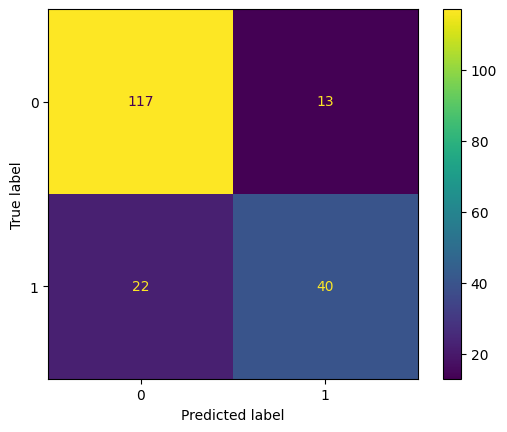

In [53]:
### Our improvement (Feature selection)

from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

#Drop non important features (Already done)

# x_train = x_train.drop("SkinThickness", axis=1)
# x_test = x_test.drop("SkinThickness", axis=1)

# x_train = x_train.drop("Insulin", axis=1)
# x_test = x_test.drop("Insulin", axis=1)

# x_train = x_train.drop("Pregnancies", axis=1)
# x_test = x_test.drop("Pregnancies", axis=1)

# x_train = x_train.drop("BloodPressure", axis=1)
# x_test = x_test.drop("BloodPressure", axis=1)

accuracy_list = []
precision_list  =[]
values_list = []

model = RandomForestClassifier(n_estimators=30, random_state=0, max_depth=7)
model.fit(x_train, y_train)

#Evaluate model
y_pred = model.predict(x_test)

accuracy = metrics.accuracy_score(y_test, y_pred)

print("Accuracy: ", accuracy)

precision = metrics.precision_score(y_test, y_pred)
print("Precision: ", precision)

confusion_matrix(y_test, y_pred)
plot_confusion_matrix(model, x_test, y_test)
plt.show()